In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
for axis in ['xtick', 'ytick']:
    plt.rcParams[f'{axis}.direction'] = 'in'
    plt.rcParams[f'{axis}.major.width'] = 1.5
    plt.rcParams[f'{axis}.minor.width'] = 1.5
    plt.rcParams[f'{axis}.major.size'] = 6
    plt.rcParams[f'{axis}.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 1.5

## Grid resolution

In [36]:
import noise

In [54]:
def get_noise(Nx, Ny, scale, octave, persistence, lacunarity):
    
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    world = np.zeros((Nx, Ny))
    for i, xi in enumerate(x):
        for j, yi in enumerate(y):
            world[i][j] = noise.pnoise2(
                    xi, yi,
                    octaves=octaves,
                    persistence=persistence,
                    lacunarity=lacunarity,
                    repeatx=N,
                    repeaty=N,
                    base=0
            )
    return world

In [55]:
world_sd = get_noise(16, 16, scale=100, octave=6, persistence=0.5, lacunarity=2.0)
world_hd = get_noise(256, 256, scale=100, octave=6, persistence=0.5, lacunarity=2.0)

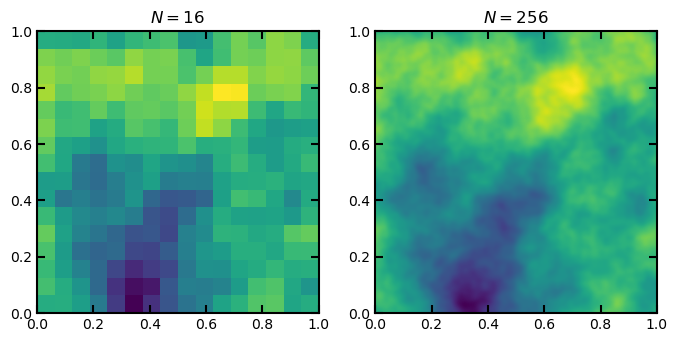

In [104]:
nr, nc = 1, 2
fig, axes = plt.subplots(nr, nc, figsize=(nc*4, nr*4), facecolor='none')

for ax in axes:
    ax.set_aspect('equal', 'box')

ax = axes[0]
ax.imshow(world_sd, extent=[0, 1, 0, 1])
ax.set_title('$N = 16$')

ax = axes[1]
ax.imshow(world_hd, extent=[0, 1, 0, 1])
ax.set_title('$N = 256$')

plt.savefig('./grid-resolution.png', dpi=180, bbox_inches='tight')

plt.show()

## Particle resolution

In [98]:
X_sd = np.random.uniform(size=(100, 2))
X_hd = np.random.uniform(size=(10000, 2))

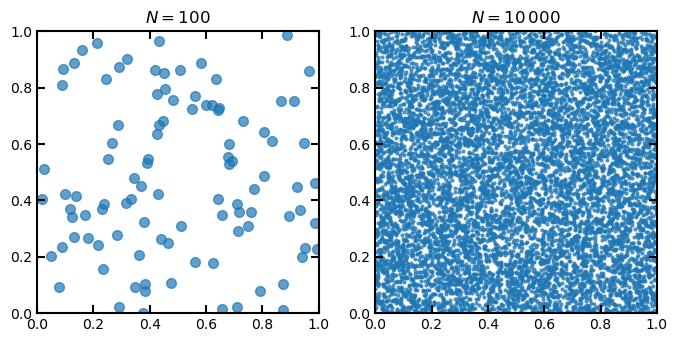

In [103]:
nr, nc = 1, 2
fig, axes = plt.subplots(nr, nc, figsize=(nc*4, nr*4), facecolor='none')

for ax in axes:
    ax.set_aspect('equal', 'box')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

ax = axes[0]
ax.scatter(*X_sd.T, s=49, alpha=0.7)
ax.set_title('$N = 100$')

ax = axes[1]
ax.scatter(*X_hd.T, s=4, alpha=0.7)
ax.set_title('$N = 10\,000$')

plt.savefig('./part-resolution.png', dpi=180, bbox_inches='tight')

plt.show()